In [5]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns



In [7]:
#reading the excel file "shootings".
data = pd.read_excel("/Users/oluwasheyi/Desktop/shootings.xlsx")
data['date']=pd.to_datetime(data['date'],format="%m %d %Y")
#pd. to_datetime() method helps to convert string Date time into Python Date time object.


In [8]:
#Examine the data by looking at the first 5 rows of the data
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [9]:
data.shape
#This shows the number of rows and columns in our data

(4895, 15)

Observation: There are 4895 rows and 15 columns in this dataset

In [15]:
#the type of data in dataframe
data.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
arms_category                      object
dtype: object

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       4895 non-null   int64         
 1   name                     4895 non-null   object        
 2   date                     4895 non-null   datetime64[ns]
 3   manner_of_death          4895 non-null   object        
 4   armed                    4895 non-null   object        
 5   age                      4895 non-null   float64       
 6   gender                   4895 non-null   object        
 7   race                     4895 non-null   object        
 8   city                     4895 non-null   object        
 9   state                    4895 non-null   object        
 10  signs_of_mental_illness  4895 non-null   bool          
 11  threat_level             4895 non-null   object        
 12  flee                     4895 non-

In [18]:
#checking for missing values
data.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

In [20]:
#checking for duplicated values
data.duplicated().sum()

0

Observation: Dataset is complete and there are no mising or duplicate  values.Data cleaning is therefore not necessary

In [21]:
data.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


EXAMINING THE DATA-BASIC ANALYSIS

In [6]:
data.gender.value_counts()
#This shows the number of males and females who were killed

M    4673
F     222
Name: gender, dtype: int64

Observation:There are 222 Femalesand 4673 males.More males were killed as compared to females.

In [7]:
data.race.value_counts()
#this counts the number of people in a particular race

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64

In [8]:
data.manner_of_death.value_counts()
#This shows number of people who died through a particular manner of death

shot                4647
shot and Tasered     248
Name: manner_of_death, dtype: int64

Observation: 4647 people were shot to death.248 people were shot and tasered. A greater proportion of people who died were shot as compared to those who were shot and tasered at the same time.

In [9]:
data.armed.value_counts()
#This shows the number of people who were armed with a particular weapon

gun                                 2755
knife                                708
unknown                              418
unarmed                              348
toy weapon                           171
                                    ... 
baseball bat and fireplace poker       1
pen                                    1
carjack                                1
car, knife and mace                    1
wrench                                 1
Name: armed, Length: 89, dtype: int64

In [10]:
data.signs_of_mental_illness.value_counts()
#the number of people who showed and did not show signs of mental illness

False    3792
True     1103
Name: signs_of_mental_illness, dtype: int64

In [25]:
b_camera = data.body_camera.value_counts()
b_camera.head()
#Number of killings which were recorded.

False    4317
True      578
Name: body_camera, dtype: int64

In [26]:
data.body_camera.sum()

578

In [22]:
h_shotCity=data.city.value_counts(ascending=False)
h_shotCity.head()


Los Angeles    78
Phoenix        66
Houston        51
Las Vegas      41
San Antonio    40
Name: city, dtype: int64

In [20]:
A_category=data.arms_category.value_counts()
A_category
#number of arms(category) used.

Guns                     2764
Sharp objects             818
Unknown                   418
Unarmed                   348
Other unusual objects     192
Blunt instruments         122
Vehicles                  121
Multiple                   54
Piercing objects           29
Electrical devices         24
Explosives                  4
Hand tools                  1
Name: arms_category, dtype: int64

In [14]:
F_lee = data.flee.value_counts()
F_lee
#number of suspects who attempted fleeing

Not fleeing    3073
Car             820
Foot            642
Other           360
Name: flee, dtype: int64

   # DATA VISUALIZATION
# How many number of killings according to race were recorded?


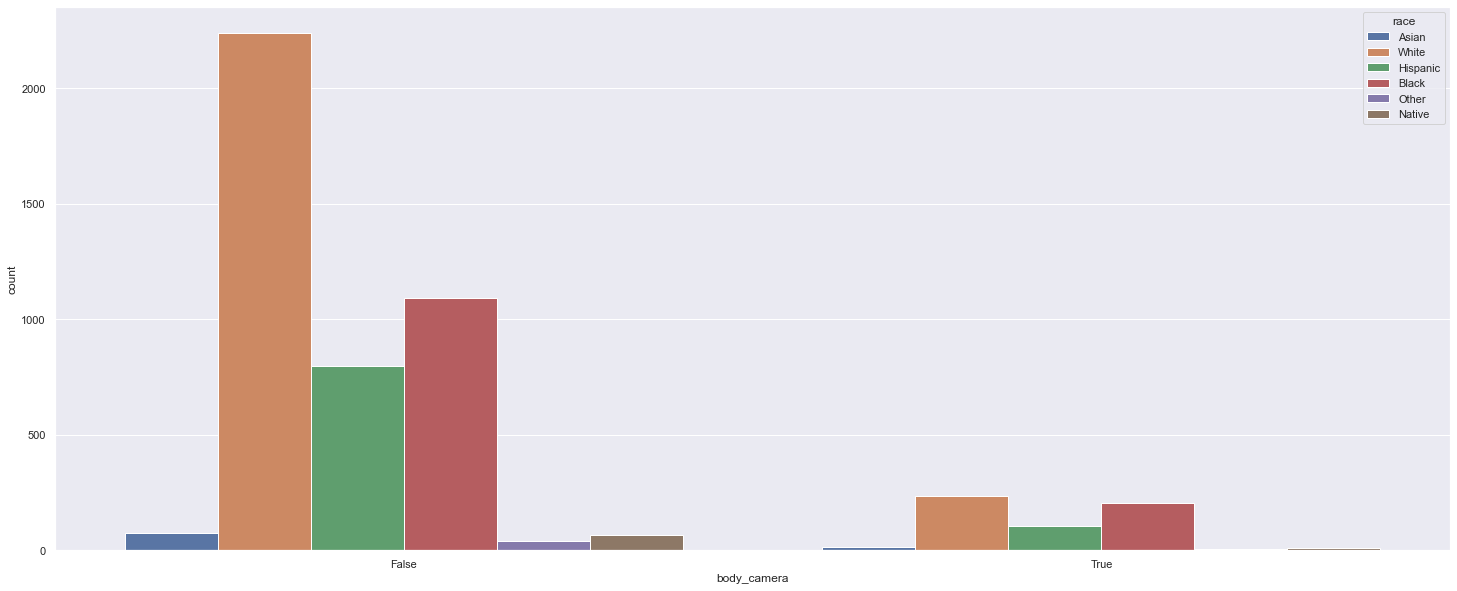

In [40]:
sns.countplot(x='body_camera',data=data, hue="race");
sns.set(rc={'figure.figsize':(25,10)})

# which race had the highest number of killings?.How many men and women were killed under a specific race?

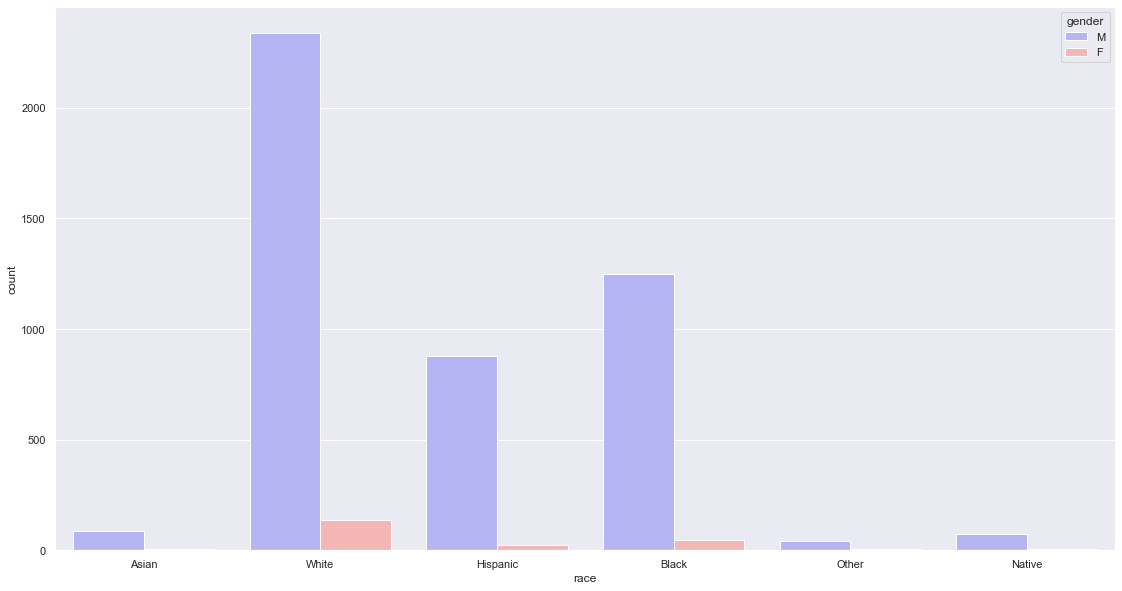

In [32]:
sns.countplot(x='race',data=data, hue="gender",palette='bwr');
sns.set(rc={'figure.figsize':(25,6)})

# what is the age distribution of killings based in gender?

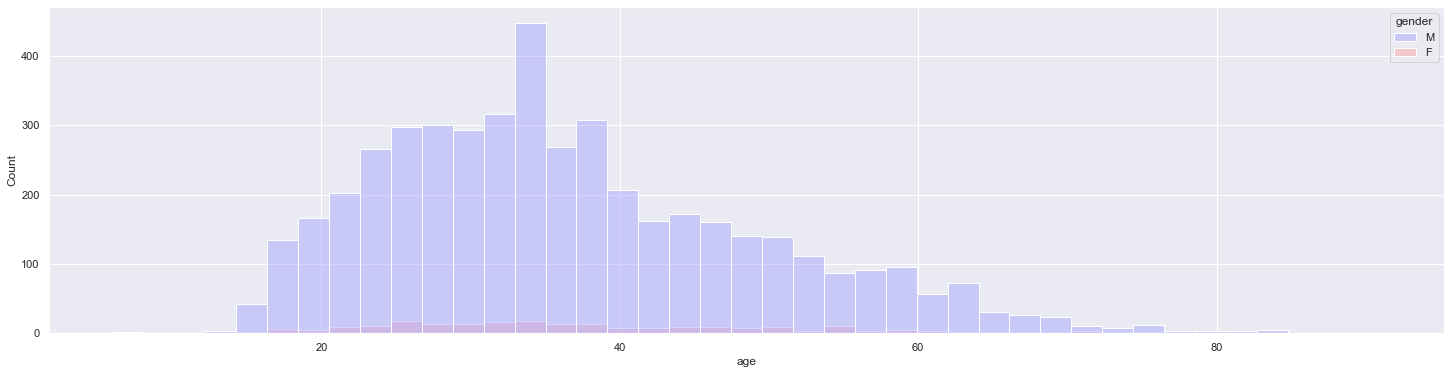

In [33]:
sns.histplot(data=data, x='age',hue='gender',palette='bwr');
sns.set(rc={'figure.figsize':(22,6)})

# which state recorded the highest number of killings?.

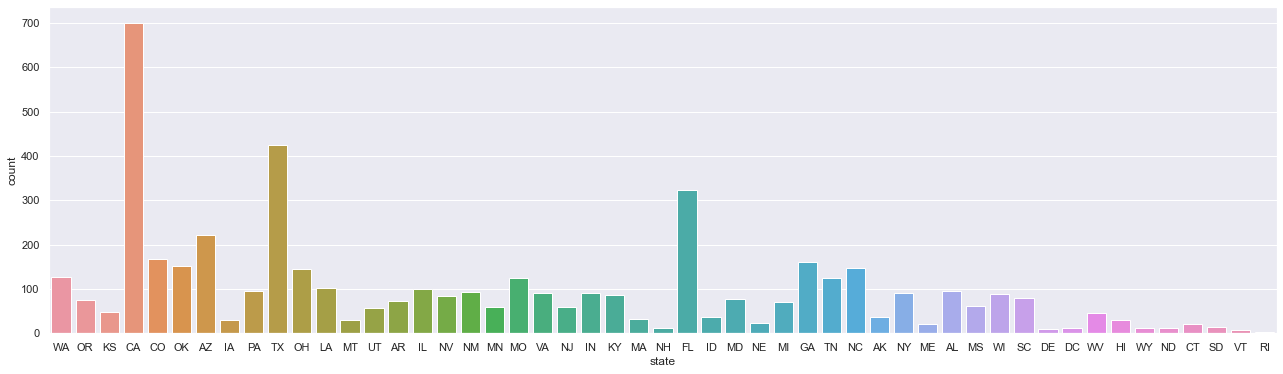

In [34]:
sns.countplot(x='state',data=data,);
sns.set(rc={'figure.figsize':(30,6)})

# Which city has the highest shooting?

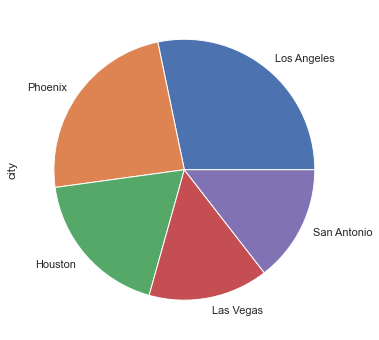

In [35]:
h_shotCity.head().plot(kind='pie');
sns.set(rc={'figure.figsize':(5,5)})

# Which race used the highest arms(category)?

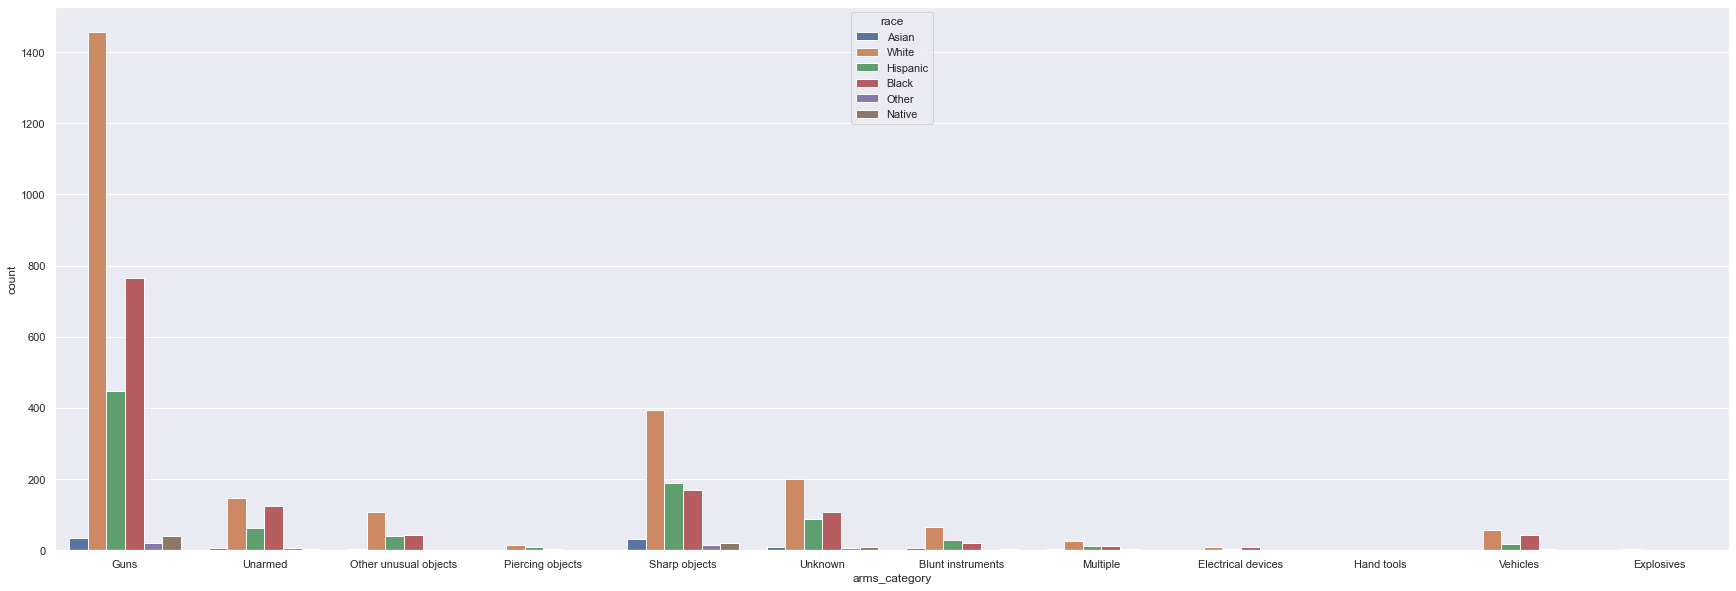

In [23]:
sns.countplot(x='arms_category',data=data, hue="race");
sns.set(rc={'figure.figsize':(31,10)})


# How many suspects attempted fleeing?

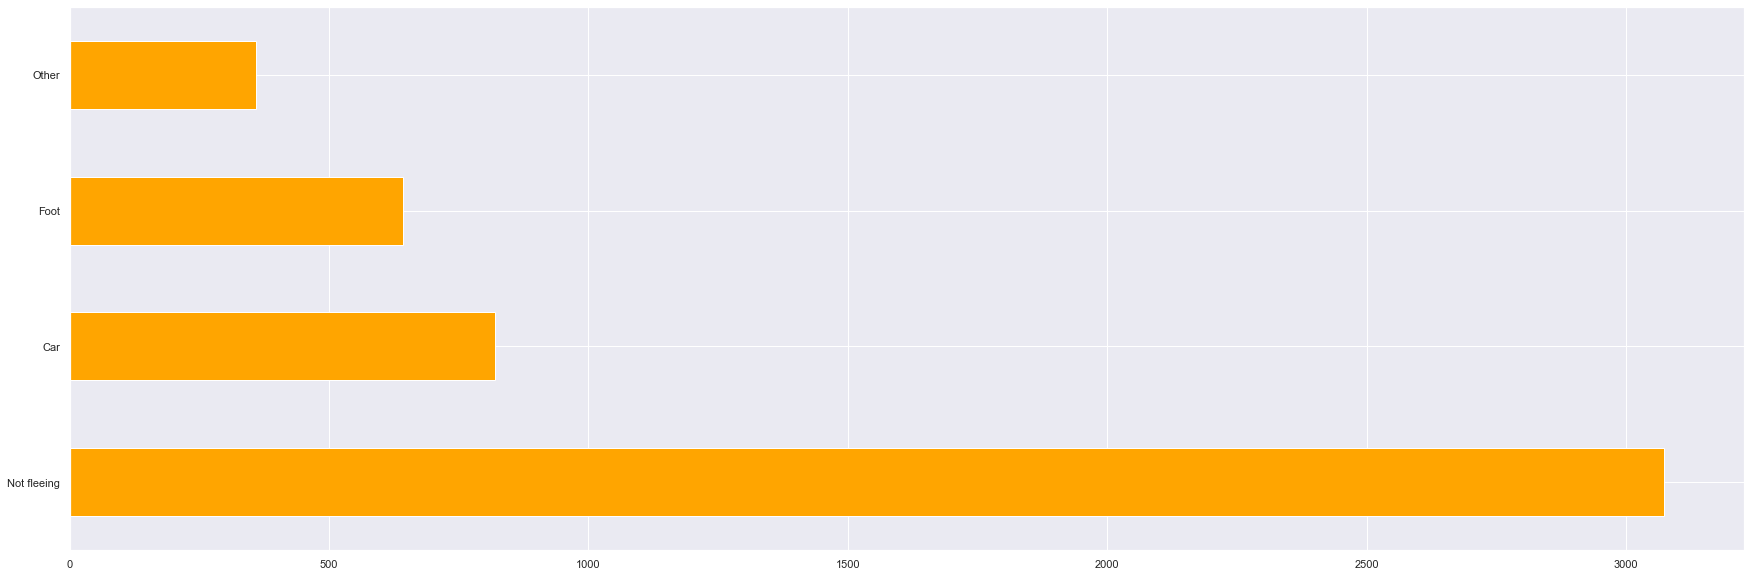

In [29]:
F_lee.plot(kind='barh',color="orange");
sns.set(rc={'figure.figsize':(20,5)})

# How many suspects below and above 18 years were killed? How many are males and females?

In [55]:
#Below 18 years
under18=data.loc[data.age<=17]
#under18.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
id,,,,,,,,,,,,,,
100,Kristiana Coignard,2015-01-22,shot and Tasered,knife,17.0,F,White,Longview,TX,True,other,Not fleeing,False,Sharp objects
20,Jessie Hernandez,2015-01-26,shot,unknown,17.0,F,Hispanic,Denver,CO,False,other,Not fleeing,False,Unknown
528,Jacob Haglund,2015-02-02,shot,gun,17.0,M,White,Bay City,MI,False,attack,Not fleeing,False,Guns
149,Jason C. Hendrix,2015-02-14,shot,gun,16.0,M,White,Essex,MD,True,attack,Car,False,Guns
176,A'Donte Washington,2015-02-23,shot,gun,16.0,M,Black,Millbrook,AL,False,attack,Not fleeing,False,Guns


In [56]:
#18 and above
over18=data.loc[data.age>=18]
#over18.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
id,,,,,,,,,,,,,,
3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [57]:
Y_and_O =pd.DataFrame({'Number of Shootings':[len(over18),len(under18)]},
             index=['Over 18','Under 18'])
Y_and_O
#number of shootings of suspects more than and less than the age of 18

,Number of Shootings
Over 18,4798
Under 18,97


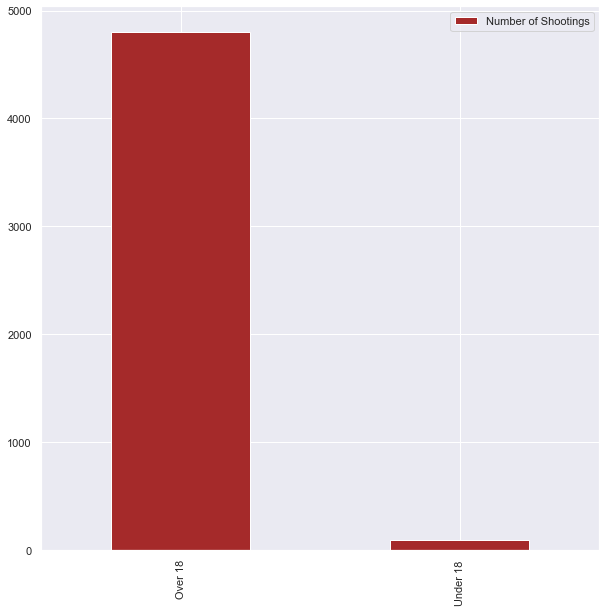

In [58]:
Y_and_O.plot(kind='bar',color='brown');
sns.set(rc={'figure.figsize':(10,10)})

# By Gender

In [59]:
#under 18 years
under18.groupby(['gender']).manner_of_death.agg([len,min,max]).sort_values(by='len',ascending =False)

,len,min,max
gender,,,
M,90,shot,shot and Tasered
F,7,shot,shot and Tasered


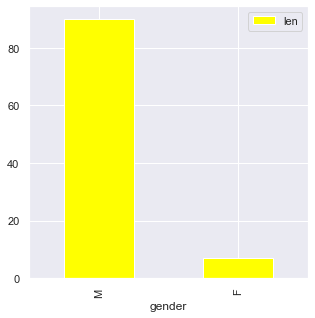

In [70]:
#under 18 years
under18.groupby(['gender']).manner_of_death.agg([len]).sort_values(by='len',ascending =False).plot(kind='bar', color='yellow');
sns.set(rc={'figure.figsize':(3,5)})

In [62]:
#over 18 years
over18.groupby(['gender']).manner_of_death.agg([len,min,max]).sort_values(by='len',ascending =False)

,len,min,max
gender,,,
M,4583,shot,shot and Tasered
F,215,shot,shot and Tasered


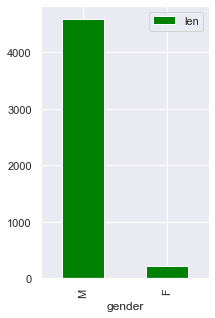

In [74]:
#over 18 years
over18.groupby(['gender']).manner_of_death.agg([len]).sort_values(by='len',ascending =False).plot(kind='bar', color='green');


# Grouping of Shootings by Year

In [77]:
shot_2015=data.loc[data['date']<='2015-12-31']
shot_2020=data.loc[(data['date']>'2019-12-31')&(data['date']<='2020-12-31')]
shot_2016=data.loc[(data['date']>'2015-12-31')&(data['date']<='2016-12-31')]
shot_2017=data.loc[(data['date']>'2016-12-31')&(data['date']<='2017-12-31')]
shot_2018=data.loc[(data['date']>'2017-12-31')&(data['date']<='2018-12-31')]
shot_2019=data.loc[(data['date']>'2018-12-31')&(data['date']<='2019-12-31')]
#shot_2015
#shot_2016
#shot_2017
#shot_2018
#shot_2019
#shot_2020

# Number of Shootings of Race Per Each Year
# a. 2015

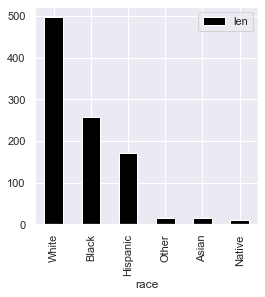

In [112]:
shot_2015.groupby(['race']).manner_of_death.agg([len]).sort_values(by='len',ascending =False).plot(kind='bar', color='black');
sns.set(rc={'figure.figsize':(4,4)})

# b. 2016

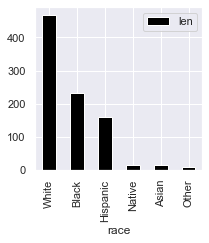

In [111]:
shot_2016.groupby(['race']).manner_of_death.agg([len]).sort_values(by='len',ascending =False).plot(kind='bar', color='black');
sns.set(rc={'figure.figsize':(4,4)})

# c. 2017

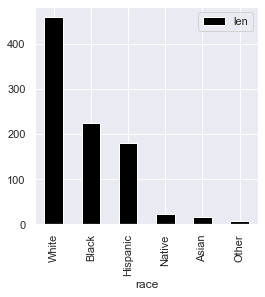

In [113]:
shot_2017.groupby(['race']).manner_of_death.agg([len]).sort_values(by='len',ascending =False).plot(kind='bar', color='black');
sns.set(rc={'figure.figsize':(4,4)})


# d. 2018

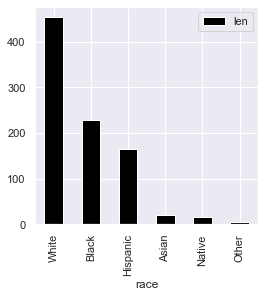

In [114]:
shot_2018.groupby(['race']).manner_of_death.agg([len]).sort_values(by='len',ascending =False).plot(kind='bar', color='black');
sns.set(rc={'figure.figsize':(4,4)})


# e. 2019

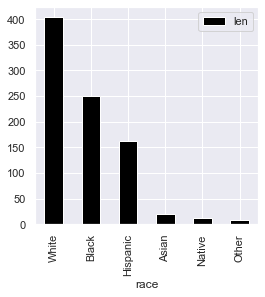

In [115]:
shot_2019.groupby(['race']).manner_of_death.agg([len]).sort_values(by='len',ascending =False).plot(kind='bar', color='black');
sns.set(rc={'figure.figsize':(4,4)})

# f. 2020

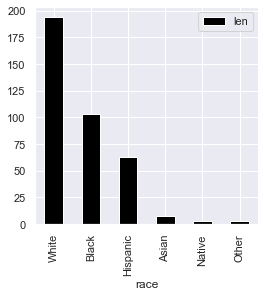

In [117]:
shot_2020.groupby(['race']).manner_of_death.agg([len]).sort_values(by='len',ascending =False).plot(kind='bar', color='black');
sns.set(rc={'figure.figsize':(4,4)})

# Armed and Unarmed blacks


In [118]:
#data for both Armed and Unarmed
b_armed=data.loc[(data.race=='Black')&~(data.arms_category=='Unarmed')]
b_unarmed=data.loc[(data.race=='Black')&(data.arms_category=='Unarmed')]



In [121]:
#length of the data
print('Blacks Unarmed:',len(b_unarmed))
print('Blacks armed:',len(b_armed))

Blacks Unarmed: 123
Blacks armed: 1175


In [122]:
#lenght of data of blacks- claimed armed 
b_armed_noproof=b_armed.loc[b_armed.body_camera==False]

In [123]:
#length  of Blacks claimed armed But no proof
print('Blacks claimed armed But no proof:',len(b_armed_noproof))

Blacks claimed armed But no proof: 994


In [128]:
#PERCENTAGE 
percentage_claim=(len(b_armed_noproof)/len(b_armed))*100
ans=round(percentage_claim)
print(f'Percentage of suspects claimed to be armed without proof:{ans}%')

Percentage of suspects claimed to be armed without proof:85%


# Percentage of suspects who fled

In [129]:
flee=data.loc[~(data.flee=='Not fleeing')]
didnt_flee=data.loc[(data.flee=='Not fleeing')]

In [130]:
print('Number of Fled Cases:',len(flee))
print('Number of no Fled Cases:',len(didnt_flee))

Number of Fled Cases: 1822
Number of no Fled Cases: 3073


In [131]:
percent_flee=(len(flee)/len(data))*100
away=round(percent_flee)
print(f'Percentage of suspects who fled: {away}%')

Percentage of suspects who fled: 37%


# Men under 45 are the victims

In [132]:
men_under45=data.loc[(data.gender=='M')&(data.age<=45)]
men_over45=data.loc[(data.gender=='M')&~(data.age<=45)]

In [133]:
print(f'Number of Men over 45 years :{len(men_over45)}')
print(f'Number of Men under 45 years :{len(men_under45)}')

Number of Men over 45 year :1082
Number of Men under 45 year :3591


In [140]:
years45=pd.DataFrame({'Year':['men_over45','men_under45'],
                      'Number_of_death':[len(men_over45),len(men_under45)]},
                    index=['Men 45 Years and above','Men below 45 Years'])
years45

,Year,Number_of_death
Men 45 Years and above,men_over45,1082
Men below 45 Years,men_under45,3591


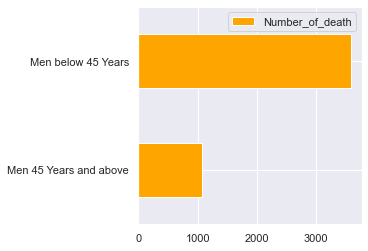

In [141]:
years45=pd.DataFrame({'Year':['men_over45','men_under45'],
                      'Number_of_death':[len(men_over45),len(men_under45)]},
                    index=['Men 45 Years and above','Men below 45 Years'])
years45.plot(kind='barh',color='orange');